# Customer Segmentation & Clustering

### **Project Goal**: 
The main aim of this project is to group mall customers into segments based on their characteristics like age, income, and spending habits. By doing this, the marketing team can tailor their strategies to target each customer group more effectively.

### Key Steps in the Project:

1. **Data Preparation**: Load customer data from a CSV file. This data includes details such as customer ID, gender, age, annual income, and a spending score that reflects their purchasing behavior.

2. **Exploratory Data Analysis (EDA)**:
   - **Statistical Summary**: Look at basic statistics (mean, median, etc.) to understand the central tendencies and dispersion of the data.
   - **Distribution Plots**: Visualize the distribution of key variables like age, income, and spending score to see patterns or outliers. This helps in understanding how these features vary among the mall customers.

3. **Univariate Analysis**:
   - This involves analyzing each variable individually. For example, using plots to see how income levels are distributed or how spending scores are spread out across different customer groups.

4. **Bivariate and Multivariate Analysis**:
   - **Bivariate Analysis**: Explore the relationship between two variables, such as income and spending score, to see if higher income leads to higher spending.
   - **Multivariate Analysis**: Look at more complex relationships involving multiple variables, which can reveal more intricate patterns in customer behavior.

5. **Clustering**:
   - Use a machine learning technique called k-means clustering to group customers into clusters based on similar traits. Each cluster will represent a group of customers who share similar characteristics.
   - **Optimize Clusters**: Determine the optimal number of clusters by using techniques like the elbow method, which helps in choosing a cluster count that balances complexity and explanatory power.

6. **Interpret Results**:
   - Analyze each cluster to understand the defining characteristics of the customer segments. For example, one cluster might consist of young, high-income but low-spending customers, while another might include older, moderate-income, high-spending customers.
   - Apply findings to develop targeted marketing strategies for each customer segment.

7. **Reporting**: Visualize and summarize the findings in a clear and concise manner to share with stakeholders, helping them make informed decisions on marketing strategies based on the clustering analysis.

This project enables the marketing team to craft personalized marketing messages and offers based on the specific needs and behaviors of different customer groups, enhancing customer satisfaction and potentially increasing sales.

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset and display the first few entries
df = pd.read_csv("/Users/saisrivatsat/Downloads/Portfolio/Projects/Python Customer Segmentation/Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Section 1: Univariate Analysis


In [3]:
# Generate descriptive statistics to understand the dataset
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


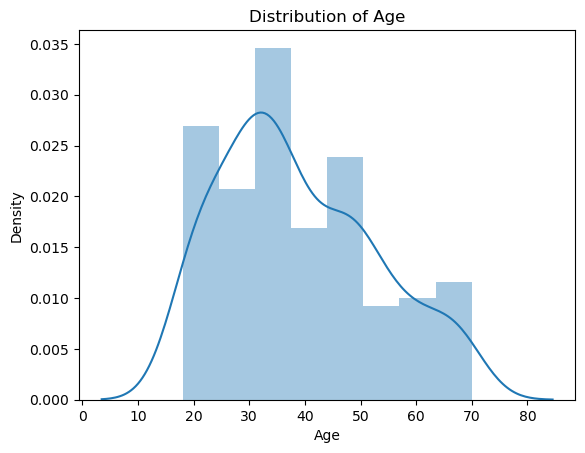

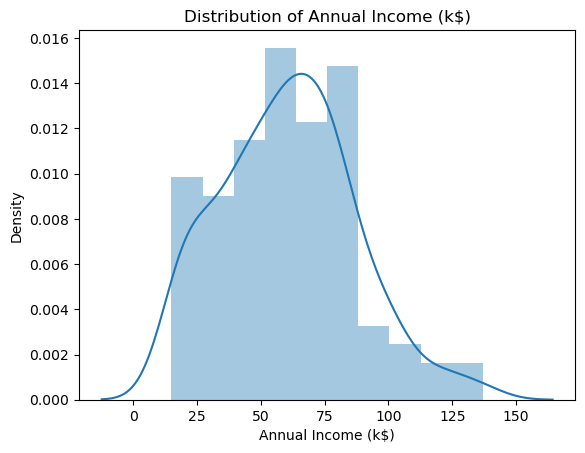

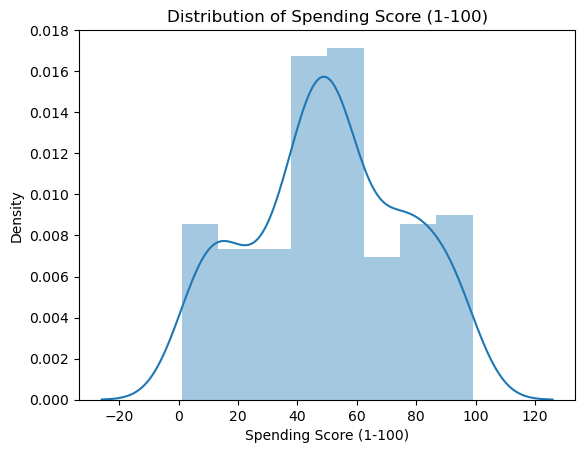

In [4]:
# Visualize distributions of key numerical features
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in columns:
    plt.figure()
    sns.distplot(df[col], kde=True, hist=True)
    plt.title(f'Distribution of {col}')
    plt.show()


1. **Age Distribution**: Most customers are in their early 30s, with a broad age range from teens to people in their 70s.

2. **Annual Income Distribution**: The majority of customers earn between $50,000 and $75,000 annually, with fewer customers having very high incomes.

3. **Spending Score Distribution**: Spending scores are spread out, with two main peaks around 50, indicating many customers have mid-range spending behavior. 

These plots help identify key customer characteristics like common age groups, income levels, and spending habits.

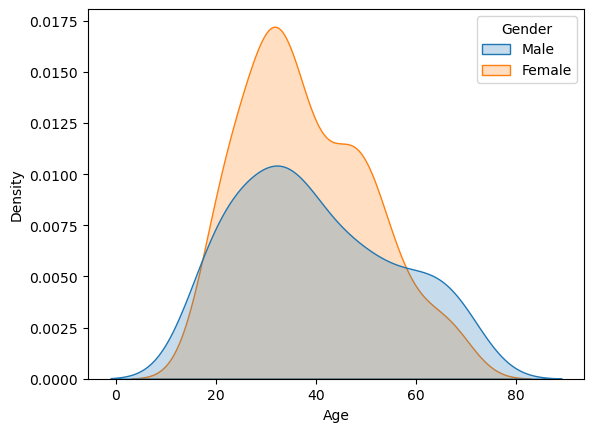

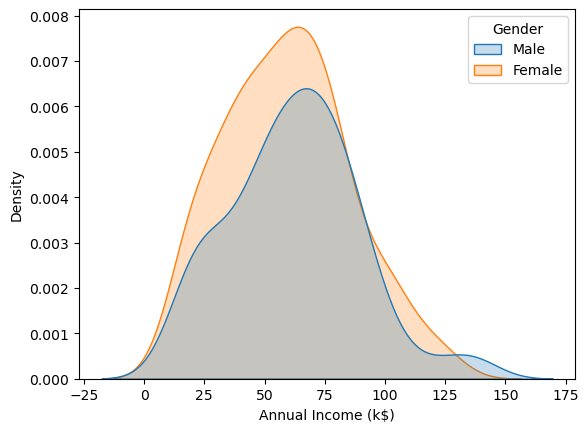

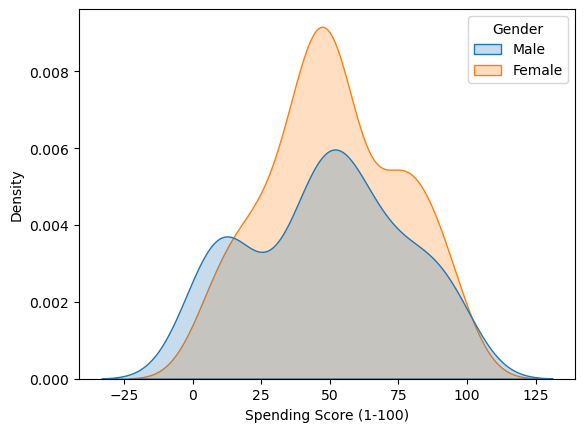

In [5]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender'])

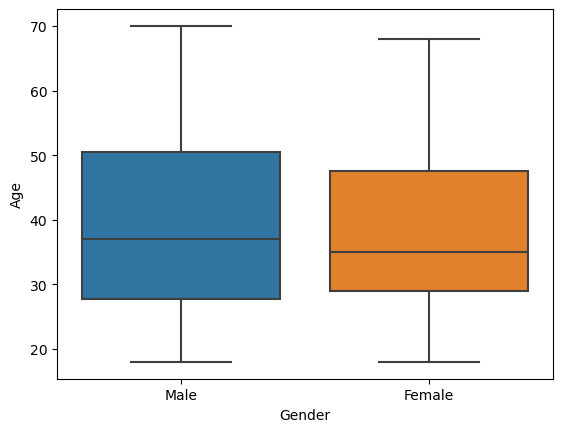

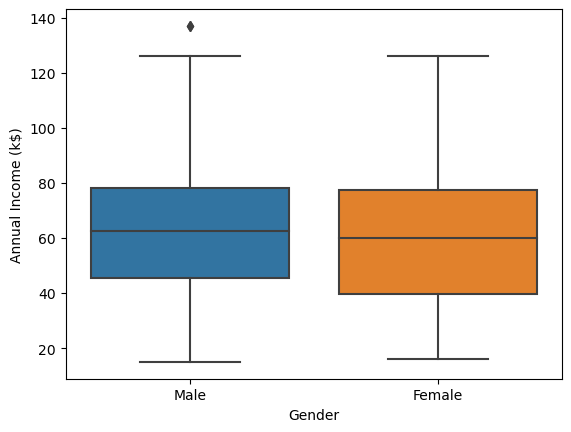

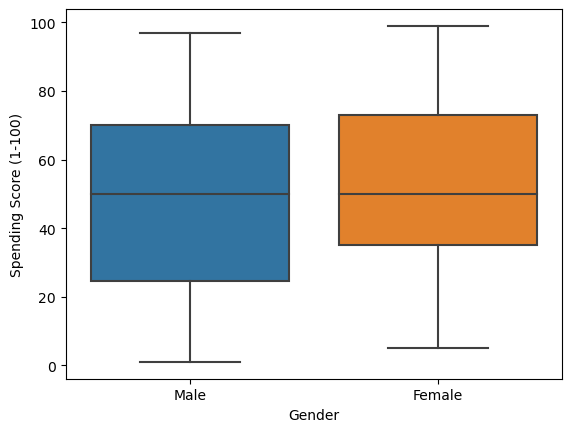

In [6]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

## Section 2: Gender Distribution

In [7]:
# Display gender distribution as a percentage
print(df['Gender'].value_counts(normalize=True))

Female    0.56
Male      0.44
Name: Gender, dtype: float64


## Section 3: Bivariate Analysis

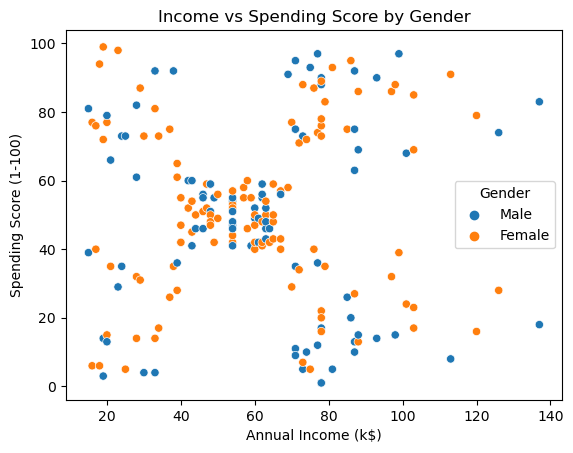

In [8]:
# Scatter plot to analyze the relationship between 'Annual Income' and 'Spending Score'
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Income vs Spending Score by Gender')
plt.show()

This scatter plot shows the relationship between **income** and **spending score** for male (blue) and female (orange) customers:

- **No clear pattern**: Spending scores are scattered across all income levels, meaning income doesn't strongly predict spending.
- **Both genders**: Have similar distributions in terms of income and spending, with some variation.

This helps understand that spending behavior isn’t directly tied to income level, and both genders show similar spending patterns across different income ranges.

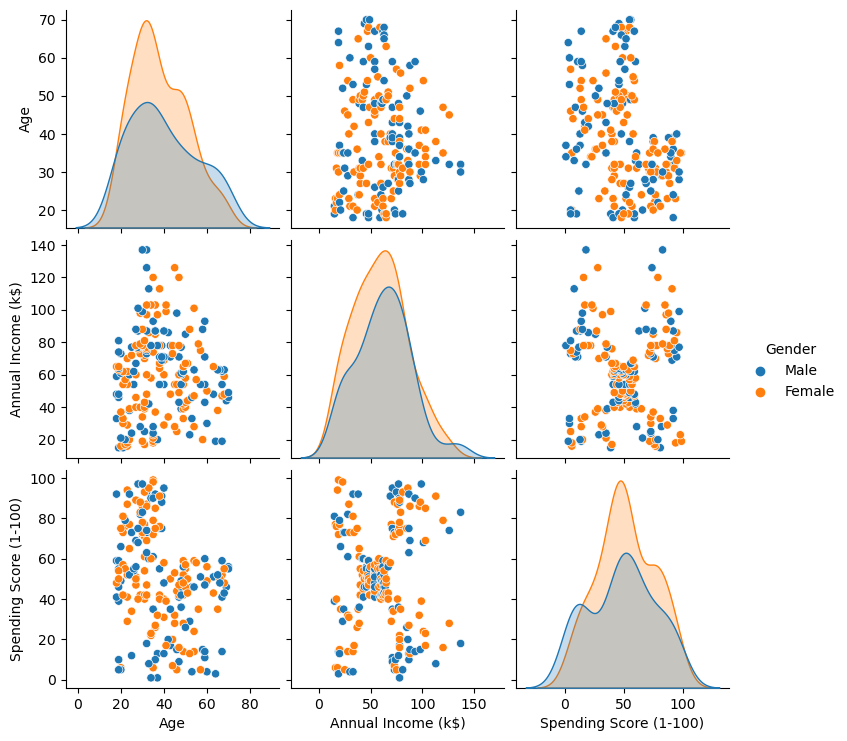

In [9]:
# Pairplot to visualize relationships and distributions segmented by gender
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender')
plt.show()

This is a **pair plot** that shows the relationships between age, annual income, and spending score, separated by gender (blue for males, orange for females).

### Key Points:
- **Diagonals**: Show the distribution of each variable by gender. For example, females tend to be slightly younger and have slightly higher spending scores.
- **Scatter plots**: Show the relationship between each pair of variables (e.g., income vs. spending). There's no strong linear relationship between any pair of variables, meaning one doesn’t predict the other very well.

Overall, this plot provides a quick way to compare multiple variables and see how they interact with each other across different genders.

In [10]:
# Display mean values by gender for age, income, and spending score
print(df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

              Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                       
Female  38.098214           59.250000               51.526786
Male    39.806818           62.227273               48.511364


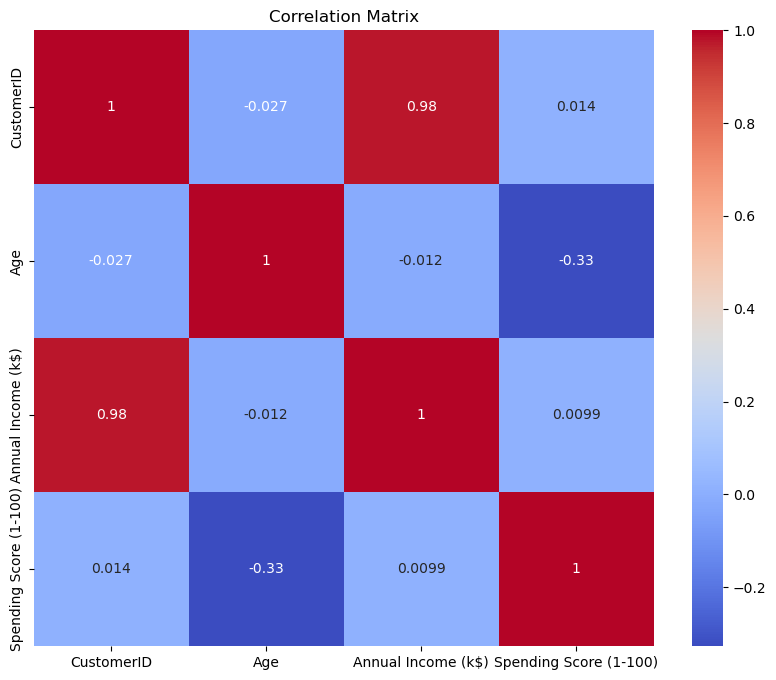

In [11]:
# Correlation matrix visualization
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows how different variables relate to each other:

- **CustomerID and Annual Income**: Strong positive correlation, but this might not be meaningful.
- **Age and Spending Score**: Moderate negative correlation, meaning older customers tend to have slightly lower spending scores.
- **Annual Income and Spending Score**: Very weak correlation, indicating income doesn’t strongly affect spending behavior. 

This helps identify which variables are related and to what extent.

## Section 4: Clustering Analysis

In [12]:
# Initialize and fit KMeans for univariate clustering based on 'Annual Income'
clustering1 = KMeans(n_clusters=3)
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [13]:
df['Income Cluster'] = clustering1.labels_

In [14]:
# Display the head of the dataframe to check the clustering
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Income Cluster  
0               1  
1               1  
2               1  
3               1  
4               1  


In [15]:
# Visualize the distribution of clusters
print(df['Income Cluster'].value_counts())

0    92
1    86
2    22
Name: Income Cluster, dtype: int64


In [16]:
# Inertia plot to determine the optimal number of clusters
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [17]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 25640.457784396836,
 13575.758441558442,
 8546.148268106163,
 7623.682410309997,
 3931.988095238095,
 2958.6639194139193,
 2171.472222222222,
 2506.0969696969696]

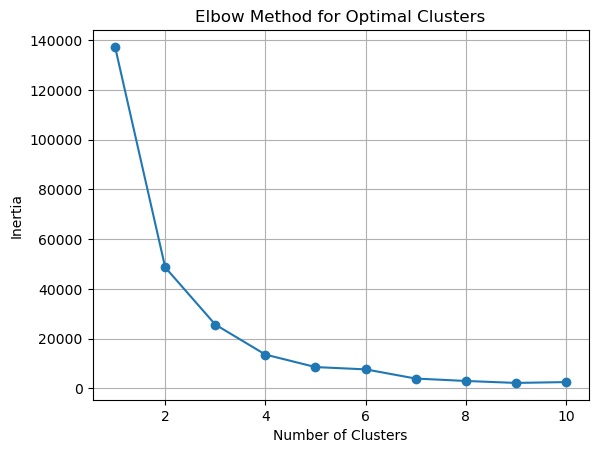

In [18]:
plt.figure()
plt.plot(range(1, 11), inertia_scores, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### Elbow Method for Optimal Clusters

This plot uses the **Elbow Method** to help determine the optimal number of clusters for K-means clustering:

- **Inertia**: Measures how well the data points fit within each cluster (lower is better).
- **Elbow Point**: The "elbow" in the graph, usually where the plot starts to flatten, suggests the optimal number of clusters.

### Key Insight:
- The elbow in this graph appears around **3-4 clusters**, indicating that this might be the optimal number of clusters to use for segmenting the data. Beyond this point, adding more clusters doesn’t significantly improve the model.

## Bivariate Clustering

In [19]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,0


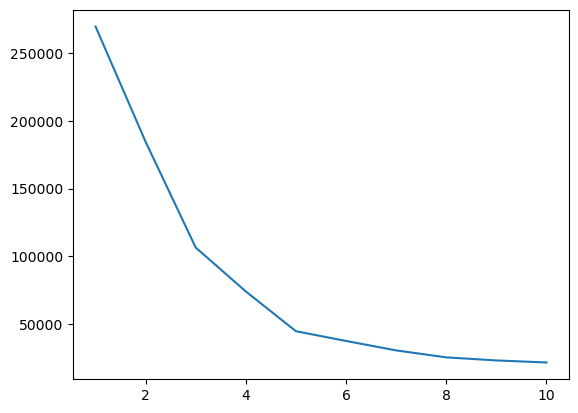

In [20]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

### Bivariate Clustering Elbow Method

This plot shows the **Elbow Method** applied to bivariate clustering using both **Annual Income** and **Spending Score**:

- **Inertia**: Decreases as the number of clusters increases, but the rate of decrease slows down after a certain point.
- **Elbow Point**: The optimal number of clusters is likely around **4 or 5** based on where the plot starts to flatten.

This suggests that using 4 or 5 clusters would likely provide a good balance between simplicity and capturing the underlying patterns in the data.

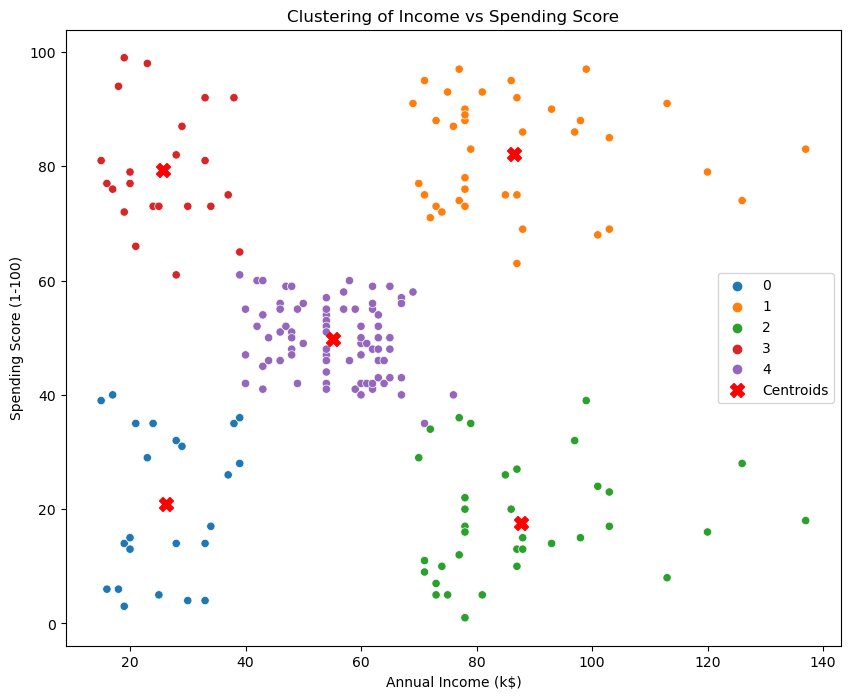

In [21]:
# Visualize clusters
centers = pd.DataFrame(clustering2.cluster_centers_, columns=['Annual Income', 'Spending Score'])
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')
plt.scatter(centers['Annual Income'], centers['Spending Score'], s=100, c='red', label='Centroids', marker='X')
plt.legend()
plt.title('Clustering of Income vs Spending Score')
plt.savefig('clustering_bivariate.png')
plt.show()

### Bivariate Clustering Visualization

This plot shows the results of clustering customers based on **Annual Income** and **Spending Score**:

- **Clusters**: Different colors represent different customer segments (0 to 4).
- **Centroids**: Red 'X' marks show the centroids or the center of each cluster.

**Interpretation**:
- Customers are grouped into five distinct segments based on their income and spending behavior.
- The centroids help understand the average profile of each cluster, useful for targeting specific marketing strategies.

In [22]:
# Crosstab to see gender distribution within clusters
print(pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index'))

Gender                         Female      Male
Spending and Income Cluster                    
0                            0.608696  0.391304
1                            0.538462  0.461538
2                            0.472222  0.527778
3                            0.590909  0.409091
4                            0.587500  0.412500


In [23]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,40.666667,87.750000,17.583333
3,25.272727,25.727273,79.363636
4,42.937500,55.087500,49.712500


## Multivariate Clustering Preparation

In [27]:
# Standardize features before multivariate clustering
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
dff = pd.get_dummies(df.drop(['CustomerID'], axis=1), drop_first=True)
scaled_features = scale.fit_transform(dff)
dff_scaled = pd.DataFrame(scaled_features, columns=dff.columns)
dff_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,-1.424569,-1.738999,-0.434801,0.523205,-1.702784,1.128152
1,-1.281035,-1.738999,1.195704,0.523205,0.352891,1.128152
2,-1.352802,-1.700830,-1.715913,0.523205,-1.702784,-0.886405
3,-1.137502,-1.700830,1.040418,0.523205,0.352891,-0.886405
4,-0.563369,-1.662660,-0.395980,0.523205,-1.702784,-0.886405


In [29]:
# Clustering on scaled data
kmeans3 = KMeans(n_clusters=5)
kmeans3.fit(dff_scaled)
dff['Multi Clusters'] = kmeans3.labels_

In [30]:
# Display the final dataframe head to verify the clustering
print(dff.head())


   Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0   19                  15                      39               1   
1   21                  15                      81               1   
2   20                  16                       6               1   
3   23                  16                      77               1   
4   31                  17                      40               1   

   Spending and Income Cluster  Gender_Male  Multi Clusters  
0                            0            1               3  
1                            3            1               2  
2                            0            0               3  
3                            3            0               2  
4                            0            0               3  


In [31]:
# Group by the new clusters and calculate the mean for each feature
cluster_summary = dff.groupby('Multi Clusters').mean()
print(cluster_summary)


                      Age  Annual Income (k$)  Spending Score (1-100)  \
Multi Clusters                                                          
0               54.035714           58.250000               44.696429   
1               33.478261           78.304348               56.304348   
2               25.245283           42.698113               62.679245   
3               45.217391           26.304348               20.913043   
4               37.545455          108.181818               52.000000   

                Income Cluster  Spending and Income Cluster  Gender_Male  
Multi Clusters                                                            
0                     0.464286                     3.750000     0.410714  
1                     0.000000                     1.391304     0.565217  
2                     0.698113                     3.584906     0.396226  
3                     1.000000                     0.000000     0.391304  
4                     2.000000        

### Evaluate the Cluster Performance

Silhouette Score: 0.3100551504384119


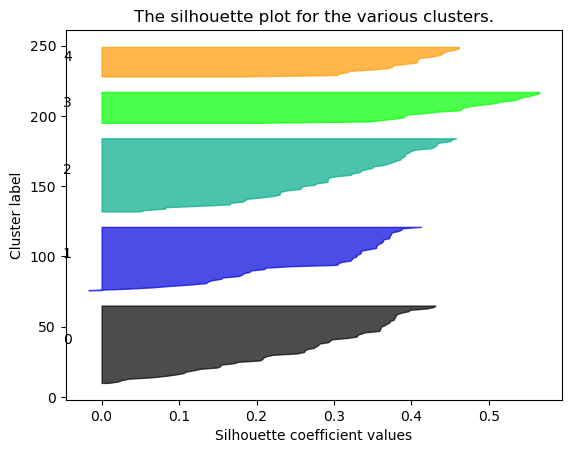

In [32]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score to evaluate the clustering performance
silhouette_avg = silhouette_score(dff_scaled, kmeans3.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Optional: Visualize the silhouette score for each sample
from sklearn.metrics import silhouette_samples
import numpy as np

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(dff_scaled, kmeans3.labels_)

# Plotting the silhouette score for each cluster
import matplotlib.cm as cm

fig, ax1 = plt.subplots(1, 1)
y_lower = 10
for i in range(5):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans3.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 5)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

plt.show()


The silhouette plot visually represents how well each data point fits within its assigned cluster compared to other clusters. Each cluster's silhouette score is shown, indicating how similar the points in a cluster are to each other versus points in other clusters. A higher silhouette score suggests better-defined and more distinct clusters. In this plot, the overall silhouette score is 0.31, suggesting moderate clustering quality, with some overlap between clusters.

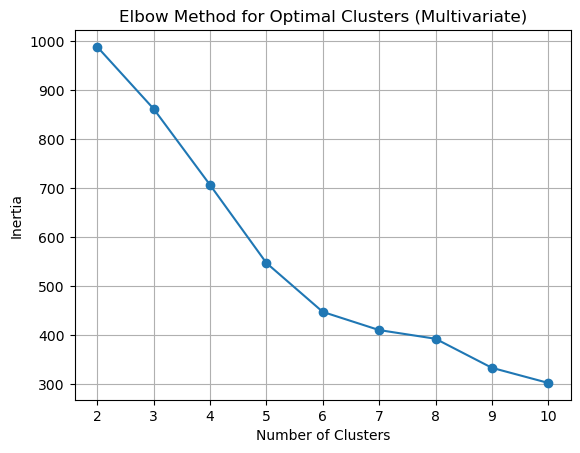

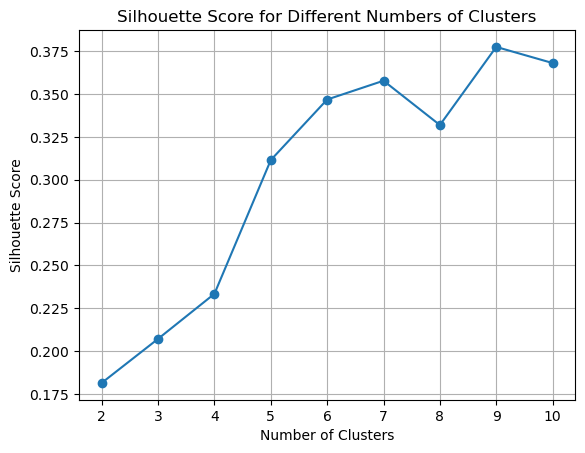

In [34]:
# Experimenting with different numbers of clusters
inertia_scores3 = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(dff_scaled)
    inertia_scores3.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(dff_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot inertia scores
plt.figure()
plt.plot(range_n_clusters, inertia_scores3, marker='o')
plt.title('Elbow Method for Optimal Clusters (Multivariate)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plot silhouette scores
plt.figure()
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

### Elbow Method for Optimal Clusters (Multivariate)
This plot shows the "elbow method" used to determine the optimal number of clusters for your data. The "elbow" point, where the inertia (within-cluster sum of squares) starts to decrease more slowly, suggests the optimal number of clusters. In this plot, the elbow appears to be around 5 or 6 clusters, indicating that these numbers of clusters might be suitable for your multivariate data.

### Silhouette Score for Different Numbers of Clusters
This plot shows the silhouette score for various numbers of clusters. The silhouette score measures how similar each point in one cluster is to points in other clusters. A higher score indicates better-defined clusters. In this plot, the silhouette score increases and stabilizes around 5 to 10 clusters, with the highest scores around 8 to 10 clusters. This suggests that the optimal number of clusters might be in this range, with 8 clusters potentially being the best choice based on the silhouette score.